New CapsNet v3
Found 22500 images belonging to 2 classes.
Trainable Parameters：443,840
563/563 [==============================] - 20s 36ms/step
Accuracy: 97.57%
Classification Report:
              precision    recall  f1-score   support

        D000     0.9780    0.9806    0.9793     13175
        D001     0.9725    0.9688    0.9707      9325

    accuracy                         0.9757     22500
   macro avg     0.9753    0.9747    0.9750     22500
weighted avg     0.9757    0.9757    0.9757     22500

Specificity: 98.06%
Top-1 Error: 2.43%
Confusion Matrix:


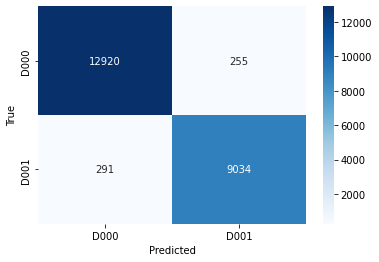

New CapsNet v3 200 epoch
Trainable Parameters：443,840
563/563 [==============================] - 20s 36ms/step
Accuracy: 97.81%
Classification Report:
              precision    recall  f1-score   support

        D000     0.9834    0.9792    0.9813     13175
        D001     0.9708    0.9766    0.9737      9325

    accuracy                         0.9781     22500
   macro avg     0.9771    0.9779    0.9775     22500
weighted avg     0.9782    0.9781    0.9781     22500

Specificity: 97.92%
Top-1 Error: 2.19%
Confusion Matrix:


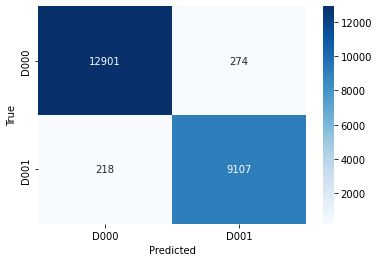

Trainable Parameters：443,840
563/563 [==============================] - 19s 34ms/step
Accuracy: 98.17%
Classification Report:
              precision    recall  f1-score   support

        D000     0.9856    0.9831    0.9844     13175
        D001     0.9763    0.9797    0.9780      9325

    accuracy                         0.9817     22500
   macro avg     0.9809    0.9814    0.9812     22500
weighted avg     0.9817    0.9817    0.9817     22500

Specificity: 98.31%
Top-1 Error: 1.83%
Confusion Matrix:


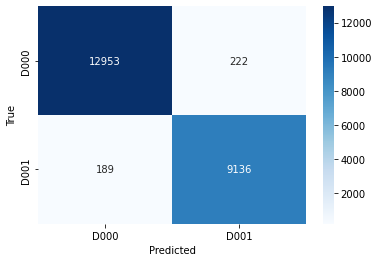

Origin CapsNet
Trainable Parameters：5,375,232
563/563 [==============================] - 58s 103ms/step
Accuracy: 50.20%
Classification Report:
              precision    recall  f1-score   support

        D000     0.6382    0.3454    0.4482     13175
        D001     0.4389    0.7234    0.5463      9325

    accuracy                         0.5020     22500
   macro avg     0.5386    0.5344    0.4973     22500
weighted avg     0.5556    0.5020    0.4889     22500

Specificity: 34.54%
Top-1 Error: 49.80%
Confusion Matrix:


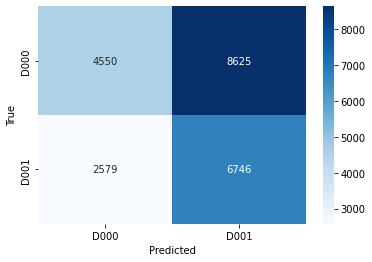

DenseNet-121
Trainable Parameters：7,027,586
563/563 [==============================] - 26s 45ms/step
Accuracy: 98.60%
Classification Report:
              precision    recall  f1-score   support

        D000     0.9837    0.9926    0.9881     13175
        D001     0.9895    0.9767    0.9831      9325

    accuracy                         0.9860     22500
   macro avg     0.9866    0.9847    0.9856     22500
weighted avg     0.9861    0.9860    0.9860     22500

Specificity: 99.26%
Top-1 Error: 1.40%
Confusion Matrix:


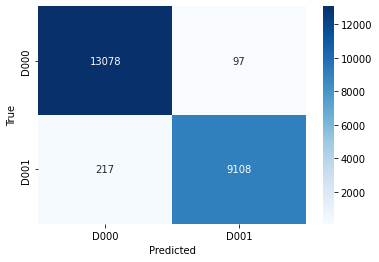

ResNet-50
Trainable Parameters：20,059,458
563/563 [==============================] - 35s 62ms/step
Accuracy: 98.56%
Classification Report:
              precision    recall  f1-score   support

        D000     0.9840    0.9915    0.9877     13175
        D001     0.9879    0.9772    0.9825      9325

    accuracy                         0.9856     22500
   macro avg     0.9859    0.9843    0.9851     22500
weighted avg     0.9856    0.9856    0.9855     22500

Specificity: 99.15%
Top-1 Error: 1.44%
Confusion Matrix:


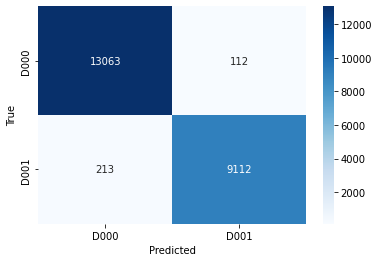

VGGNet-19
Trainable Parameters：20,059,458
563/563 [==============================] - 35s 62ms/step
Accuracy: 98.19%
Classification Report:
              precision    recall  f1-score   support

        D000     0.9758    0.9938    0.9847     13175
        D001     0.9910    0.9651    0.9779      9325

    accuracy                         0.9819     22500
   macro avg     0.9834    0.9795    0.9813     22500
weighted avg     0.9821    0.9819    0.9819     22500

Specificity: 99.38%
Top-1 Error: 1.81%
Confusion Matrix:


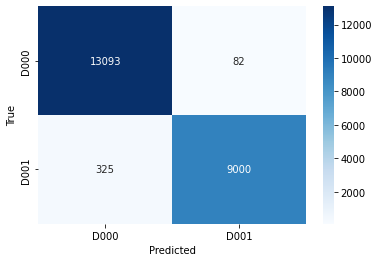

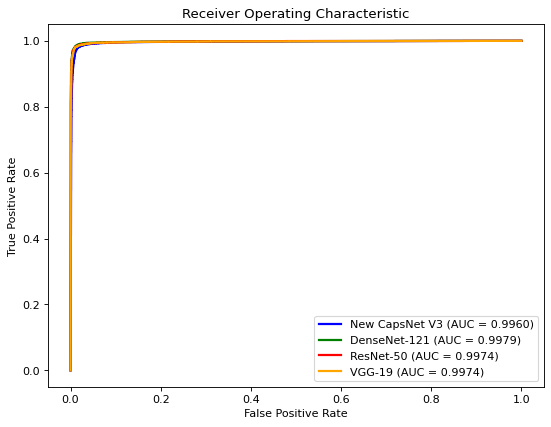

In [2]:
%run ./predict_capsnet-full-size-best.py

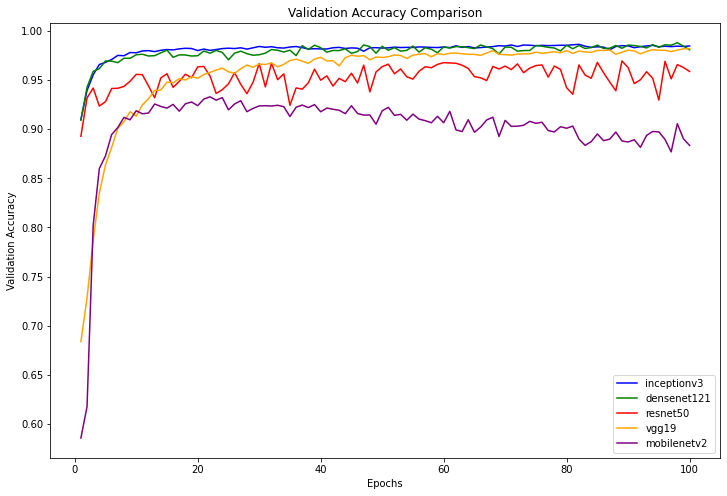

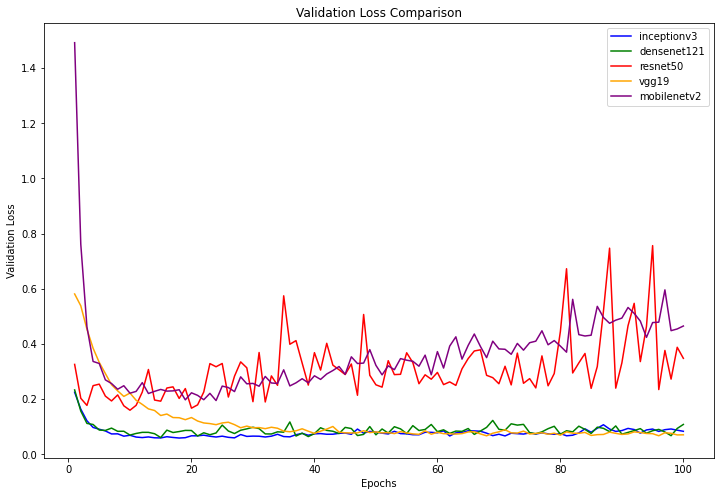

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# 設置CSV檔案路徑
csv_files = ['log-inceptionv3-full-size-da.csv', 'log-densenet121-full-size-da.csv', 'log-resnet50-full-size-da.csv', 'log-vgg19-full-size-da.csv', 'log-mobilenetv2-full-size-da.csv']

# 建立一個空的圖表
plt.figure(figsize=(12, 8))

# 迭代處理每個CSV檔案
for i, csv_file in enumerate(csv_files):
    # 讀取CSV檔案
    df = pd.read_csv(csv_file)
    model = csv_file.split('-')[1]
    
    # 提取驗證準確率數據列
    val_acc = df['val_acc']
    epochs = range(1, len(val_acc) + 1)
    
    # 尋找最大的驗證準確率及其對應的epoch
    max_val_acc = max(val_acc)
#     max_val_acc_epoch = val_acc.index(max_val_acc) + 1
    max_val_acc_epoch = np.argmax(val_acc) + 1
    
    
    
    # 繪製驗證準確率曲線，使用不同的顏色
    colors = ['blue', 'green', 'red', 'orange', 'purple']
#     plt.annotate(f"{model} Max: {max_val_acc:.4f}", xy=(max_val_acc_epoch, max_val_acc),
#                  xytext=(30, -25), textcoords='offset points', color=colors[i])
    # 標記最大值的位置
#     plt.scatter(max_val_acc_epoch, max_val_acc, marker='o', color='black')
    plt.plot(epochs, val_acc, label=f'{model}', color=colors[i])

# 添加圖例
plt.legend()

# 添加標籤和標題
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Comparison')

# 顯示圖表
plt.show()



# 建立一個空的圖表
plt.figure(figsize=(12, 8))

# 迭代處理每個CSV檔案
for i, csv_file in enumerate(csv_files):
    # 讀取CSV檔案
    df = pd.read_csv(csv_file)
    model = csv_file.split('-')[1]
    
    # 提取驗證準確率數據列
    val_loss = df['val_loss']
    epochs = range(1, len(val_loss) + 1)
    
    # 尋找最大的驗證準確率及其對應的epoch
    min_val_loss = max(val_loss)
#     max_val_acc_epoch = val_acc.index(max_val_acc) + 1
    min_val_loss_epoch = np.argmin(val_loss) + 1
    
    
    
    # 繪製驗證準確率曲線，使用不同的顏色
    colors = ['blue', 'green', 'red', 'orange', 'purple']
#     plt.annotate(f"{model} Max: {max_val_acc:.4f}", xy=(max_val_acc_epoch, max_val_acc),
#                  xytext=(30, -25), textcoords='offset points', color=colors[i])
    # 標記最大值的位置
#     plt.scatter(min_val_loss_epoch, min_val_loss, marker='o', color='black')
    plt.plot(epochs, val_loss, label=f'{model}', color=colors[i])

# 添加圖例
plt.legend()

# 添加標籤和標題
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss Comparison')

# 顯示圖表
plt.show()

